# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
     # Add 1 to the record count
    record_count += 1
    
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | yermentau
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | susuman
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | oamaru
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | smithers
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | marquette
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | selfoss
Processing Record 20 of Set 1 | waitangi
Processing Record 21 o

Processing Record 40 of Set 4 | adrar
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | papayal
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | utrik
Processing Record 45 of Set 4 | melfi
Processing Record 46 of Set 4 | malango
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | red chute
Processing Record 49 of Set 4 | massawa
Processing Record 0 of Set 5 | dolores
Processing Record 1 of Set 5 | bechar
Processing Record 2 of Set 5 | fonadhoo
City not found. Skipping...
Processing Record 3 of Set 5 | springbok
Processing Record 4 of Set 5 | nagqu
Processing Record 5 of Set 5 | inongo
Processing Record 6 of Set 5 | taoudenni
Processing Record 7 of Set 5 | tralee
Processing Record 8 of Set 5 | pogoanele
Processing Record 9 of Set 5 | taradale
Processing Record 10 of Set 5 | santana
Processing Record 11 of Set 5 | ciudad lazaro cardenas
Processing Record 12 of Set 5 | zaozersk
Processing Record 13 of Set 5 | mana
P

Processing Record 30 of Set 8 | annfield plain
Processing Record 31 of Set 8 | oskarshamn
Processing Record 32 of Set 8 | al-hamdaniya
Processing Record 33 of Set 8 | pamandzi
Processing Record 34 of Set 8 | saint-paul
Processing Record 35 of Set 8 | mikun'
Processing Record 36 of Set 8 | nema
Processing Record 37 of Set 8 | sao lourenco do sul
Processing Record 38 of Set 8 | otofuke
Processing Record 39 of Set 8 | amga
Processing Record 40 of Set 8 | ahau
City not found. Skipping...
Processing Record 41 of Set 8 | zholymbet
Processing Record 42 of Set 8 | copala
Processing Record 43 of Set 8 | aracruz
Processing Record 44 of Set 8 | lerwick
Processing Record 45 of Set 8 | shache
Processing Record 46 of Set 8 | jibia
Processing Record 47 of Set 8 | tanout
Processing Record 48 of Set 8 | san luis de la loma
Processing Record 49 of Set 8 | meulaboh
Processing Record 0 of Set 9 | petropavlovsk-kamchatsky
Processing Record 1 of Set 9 | krasnoarmeysk
Processing Record 2 of Set 9 | st. john'

Processing Record 19 of Set 12 | nizhneudinsk
Processing Record 20 of Set 12 | erdenet
Processing Record 21 of Set 12 | kyshtovka
Processing Record 22 of Set 12 | phan rang-thap cham
Processing Record 23 of Set 12 | kuanda
Processing Record 24 of Set 12 | khvalynsk
Processing Record 25 of Set 12 | naze
Processing Record 26 of Set 12 | natal
Processing Record 27 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 28 of Set 12 | nidadavole
Processing Record 29 of Set 12 | pacasmayo
Processing Record 30 of Set 12 | grand falls-windsor
Processing Record 31 of Set 12 | puerto leguizamo
Processing Record 32 of Set 12 | laguna
Processing Record 33 of Set 12 | qazax
Processing Record 34 of Set 12 | wanlaweyn
Processing Record 35 of Set 12 | tutoia
Processing Record 36 of Set 12 | richards bay
Processing Record 37 of Set 12 | marka
Processing Record 38 of Set 12 | akhmet'a
Processing Record 39 of Set 12 | jijiga
Processing Record 40 of Set 12 | ternate
Processing Record 41 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-4.99,63,75,6.69,GL,1700668960
1,yermentau,51.6214,73.1069,2.46,86,100,3.74,KZ,1700668952
2,wailua homesteads,22.0669,-159.3780,22.08,89,63,1.79,US,1700668960
3,susuman,62.7833,148.1667,-21.29,98,100,2.51,RU,1700668960
4,klyuchi,52.2667,79.1667,-3.40,50,100,5.35,RU,1700668960


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-4.99,63,75,6.69,GL,1700668960
1,yermentau,51.6214,73.1069,2.46,86,100,3.74,KZ,1700668952
2,wailua homesteads,22.0669,-159.3780,22.08,89,63,1.79,US,1700668960
3,susuman,62.7833,148.1667,-21.29,98,100,2.51,RU,1700668960
4,klyuchi,52.2667,79.1667,-3.40,50,100,5.35,RU,1700668960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

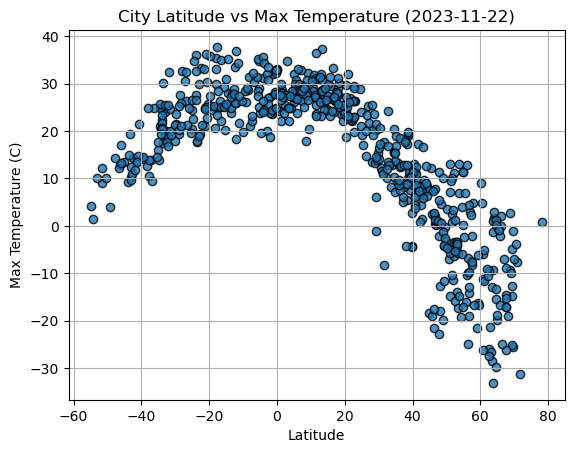

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title ("City Latitude vs Max Temperature (2023-11-22)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

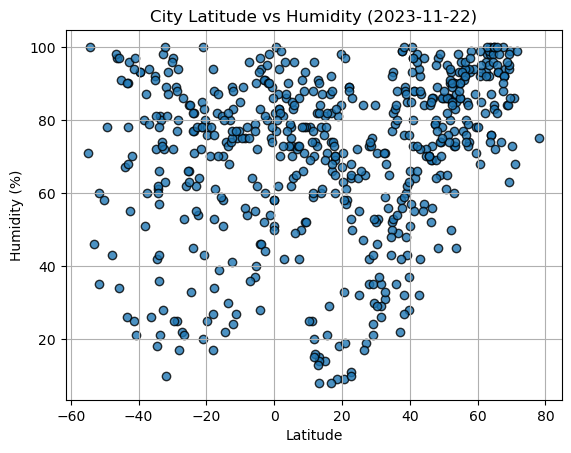

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title ("City Latitude vs Humidity (2023-11-22)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

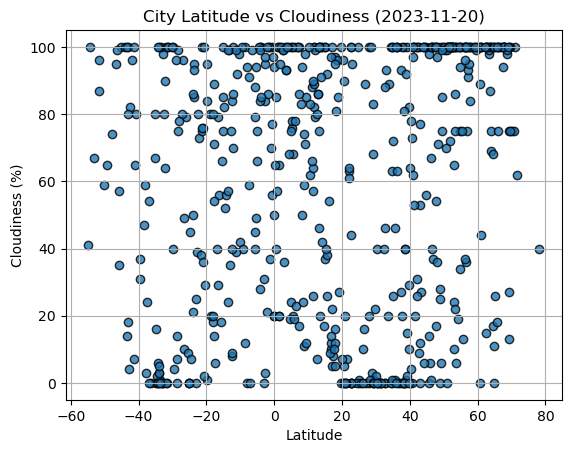

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor = 'black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title ("City Latitude vs Cloudiness (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

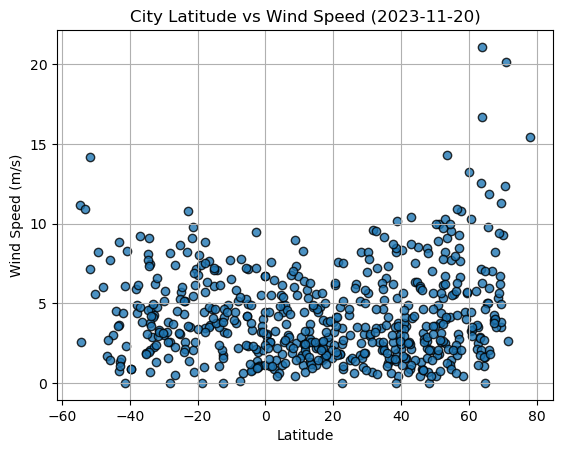

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor = 'black', alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title ("City Latitude vs Wind Speed (2023-11-20)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def lr_plots(df, coords):
    
    # This function calculates linear regression and plots scatter plots that include the regression and equation line
    # argument df should be a pandas DataFrame with 2 columns (x and y)
    # argument coords should be (x,y) values where to annonate line equation on the plot
    
    #calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[df.columns[0]],df[df.columns[1]])
    
    #print r value
    print(f"The r-value is: {round(rvalue,2)}")

    #calculate regression fit and create line equation
    regress_values = df[df.columns[0]] * slope + intercept
    line_eq = f'y= {round(slope,1)}x + {round(intercept,1)}'

    # ploting
    # create dict to be used for y label plots
    label_dict = {"Max Temp": "Max Temperature (C)",
                  "Humidity": "Humidity (%)",
                  "Cloudiness": "Cloudiness (%)",
                  "Wind Speed": "Wind Speed (m/s)"}
    
    # scatter plot
    plt.scatter(df[df.columns[0]],df[df.columns[1]])
    plt.plot(df[df.columns[0]],regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(label_dict[df.columns[1]])
    plt.annotate(line_eq, coords,fontsize=15,color="red")
    # if corr is positive, show line equation in the bottom left corner, otherwise show it in 
    plt.show()    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-4.99,63,75,6.69,GL,1700668960
1,yermentau,51.6214,73.1069,2.46,86,100,3.74,KZ,1700668952
2,wailua homesteads,22.0669,-159.3780,22.08,89,63,1.79,US,1700668960
3,susuman,62.7833,148.1667,-21.29,98,100,2.51,RU,1700668960
4,klyuchi,52.2667,79.1667,-3.40,50,100,5.35,RU,1700668960


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,minas de marcona,-15.2119,-75.1103,20.21,58,85,6.10,PE,1700668960
6,oamaru,-45.0784,170.9801,13.54,91,100,3.01,NZ,1700668960
9,blackmans bay,-43.0167,147.3167,10.29,90,18,1.32,AU,1700668961
10,puerto ayora,-0.7393,-90.3518,24.75,89,56,4.02,EC,1700668961
14,port-aux-francais,-49.3500,70.2167,4.05,78,65,8.21,TF,1700668961


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.88


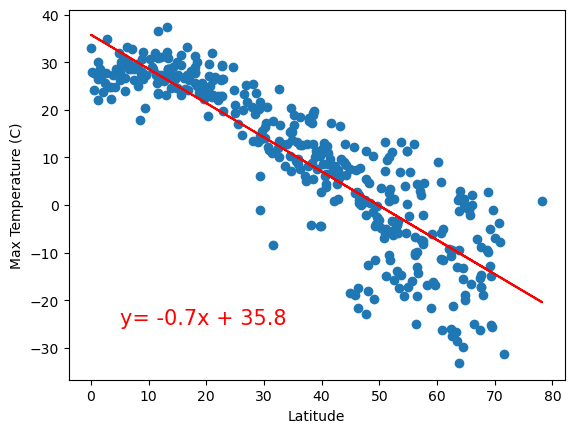

In [15]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df[["Lat", "Max Temp"]]
coords = (5, -25)
lr_plots(df,coords)

The r-value is: 0.7


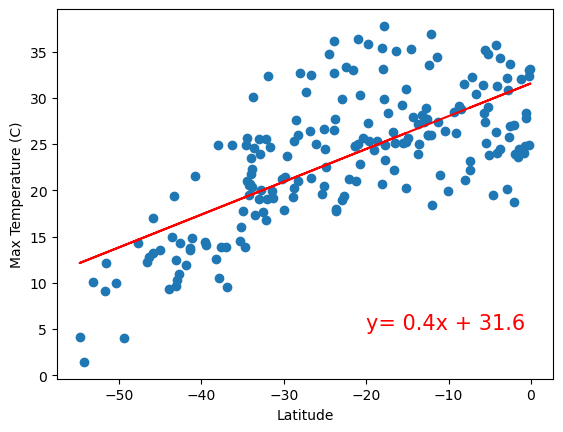

In [16]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df[["Lat", "Max Temp"]]
coords = (-20, 5)
lr_plots(df, coords)

**Discussion about the linear relationship:**

These regression analyses reveal an opposite relationship between Latitude and Maximum Temperature in the northern and southern hemispheres. Whilst in the northern hemisphere there is a strong negative correlation between latitude and maximum temperature (so that the higher the latitude, the lower the maximum temperature), this relationship is inverse in the southern hemisphere, where higher latitudes are moderately associated with higher maximum temperatures. Taken together, these analyses allow us to conclude that the closer one is to the equator, the higher the maximum temperature will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.35


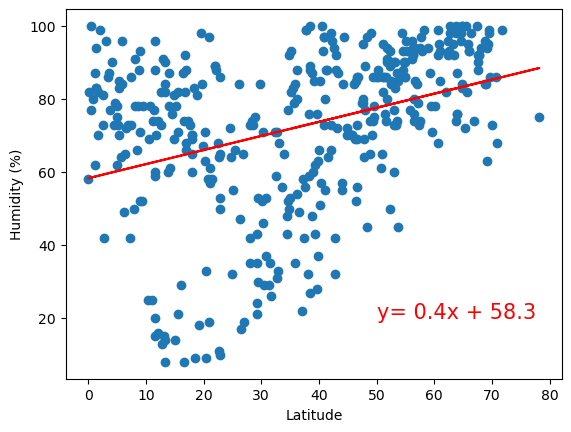

In [17]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Humidity"]]
coords = (50, 20)
lr_plots(df, coords)

The r-value is: 0.03


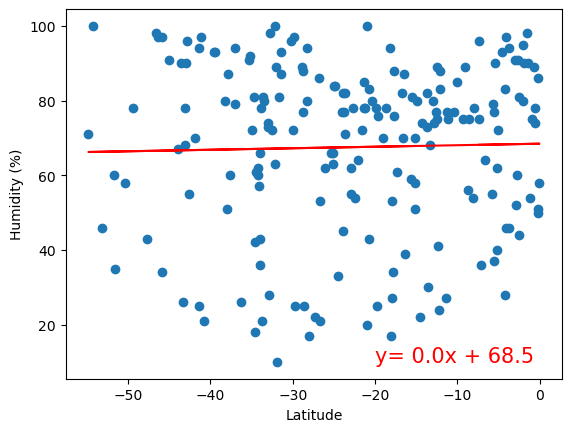

In [23]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Humidity"]]
coords = (-20, 10)
lr_plots(df, coords)

**Discussion about the linear relationship:** 

In the northern hemisphere, there is a weak relationship between Latitude and percentage of Humidity. This indicates that latitude can only explain a small amount of variability in the percentage of humidity.

No such relationship is found in the southern hemispheres, where latitude does not seem to at all predict the percentage of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19


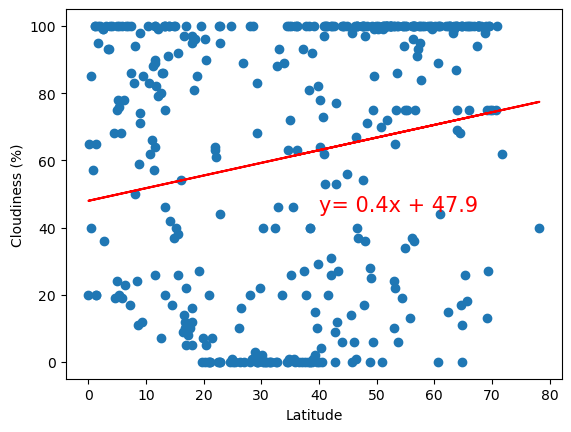

In [26]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Cloudiness"]]
coords = (40, 45)
lr_plots(df, coords)

The r-value is: 0.13


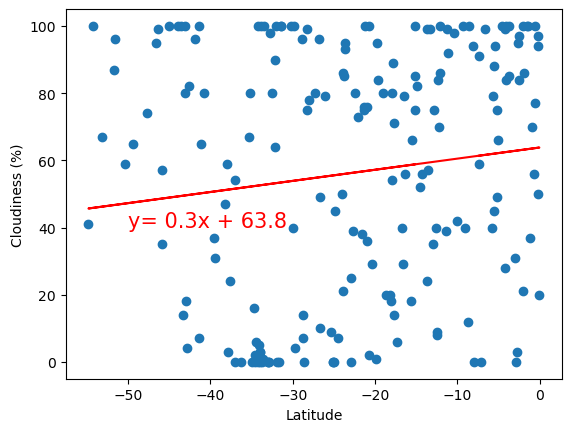

In [27]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Cloudiness"]]
coords = (-50, 40)
lr_plots(df, coords)

**Discussion about the linear relationship:** 

In both hemispheres, Latitude is only very weakly associated with the percentage of Cloudiness. Thus, latitude can only explain a very small amount (if any) of variance in the percentage of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.28


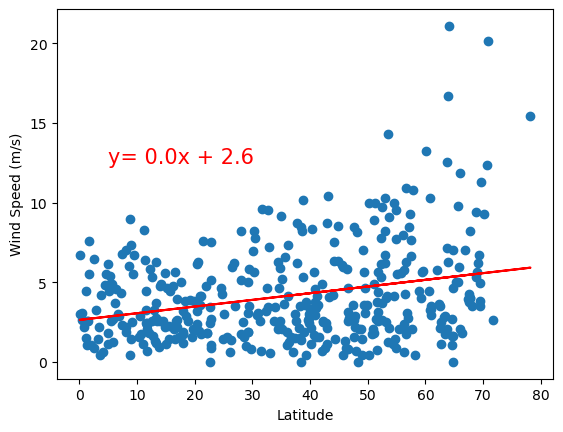

In [28]:
# Northern Hemisphere
df = northern_hemi_df[["Lat", "Wind Speed"]]
coords = (5, 12.5)
lr_plots(df, coords)

The r-value is: -0.17


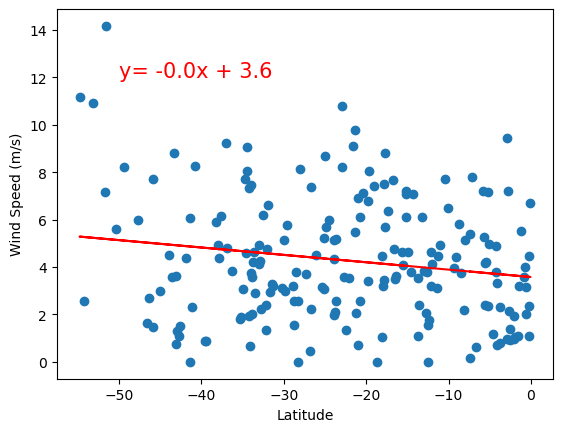

In [29]:
# Southern Hemisphere
df = southern_hemi_df[["Lat", "Wind Speed"]]
coords = (-50, 12)
lr_plots(df, coords)

**Discussion about the linear relationship:** 

Similarly to the analyses above, Latitude is only very weakly associated with Wind Speed, both in the northern and southern hemispheres. 

It might be interesting to note that the correlation between the two variables follows an opposite pattern (positive in the northern hemisphere, negative in the southern), but given how small these correlations one should be extremely careful when attempting any meaningful interpretation of these patterns. 